<ipython-input-3-d079c4ffa595>:41: RuntimeWarning: overflow encountered in square
  cost = (error**2).sum() / 2.0


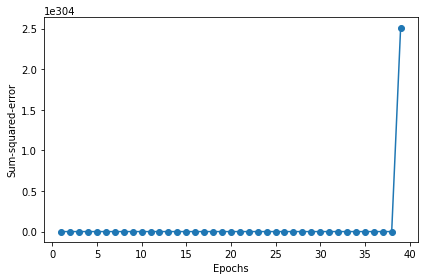

Misclassified samples: 28936

sum squared error = 0 till # epoches increase to 40 then sum squared error increase above 2 we should decrease # epoches below 40 so that sum squared error = 0


In [3]:
                             
                              
                                    

%matplotlib inline

import os, math
from IPython.display import Image
import numpy as np
seed = np.random.seed

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# /*******************************************/
# /**********************************************/

class AdalineGD(object):
    
    
    def __init__(self, eta=0.1, n_iter=50, random_state=1):
        self.eta = eta                   # learning rate
        self.n_iter = n_iter             # number of epoches
        self.random_state = random_state # the seed of random number generator

    
    
    def fit(self, X, y):
                
        rgen = np.random.RandomState(self.random_state)
        # weights after fitting
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.activation(X)
            
            # Cost function
            error = (y - output)
            cost = (error**2).sum() / 2.0
            self.cost_.append(cost)
            
            # Update rule
            self.w_[1:] += self.eta * X.T.dot(error)
            self.w_[0] += self.eta * error.sum()
            
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X.astype(float).astype(int), self.w_[1:].astype(float).astype(int)) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
    
# /************************************************/

df = pd.read_csv('weatherHistory.csv' , header = None)

df.columns = ['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)'
             , 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)'
             , 'Loud Cover', 'Pressure (millibars)', 'Daily Summary']


X = df[['Temperature (C)', 'Apparent Temperature (C)'
             , 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)'
             , 'Loud Cover']].values
y = pd.factorize(df['Humidity'])[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# /************************************/
# /************************************/

ada = AdalineGD(n_iter=50, eta=0.1)
ada.fit(X_train, y_train)

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

y_pred = ada.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

# comment
print('\nsum squared error = 0 till # epoches increase to 40 then sum squared error increase above 2 '  
       'we should decrease # epoches below 40 so that sum squared error = 0')

